<a href="https://colab.research.google.com/github/SMayienda/sarah_m/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name:
* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


In [4]:
# loading the libraries that we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset from the csv file

In [5]:
# assign the dataframe to movie_gross
movie_gross = pd.read_csv('/content/bom.movie_gross.csv.gz')


Getting the size of the datasets

In [6]:
movie_gross.shape

(3387, 5)

Getting the first rows of the datasets

In [7]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Accessing information about our dataset

In [8]:
print(movie_gross.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


Completeness

In [9]:
# Checking for null values
movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Accuracy

In [10]:
# Checking for duplicates
movie_gross.duplicated().sum()

0

Top 10 selling movies ( Domestic and Foreign)

In [12]:
# sort movies by total gross revenue(domestic+foreign)
# Convert 'domestic_gross' and 'foreign_gross' to numeric, handling errors
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross = movie_gross.sort_values(by='total_gross', ascending=False).head(10)
movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


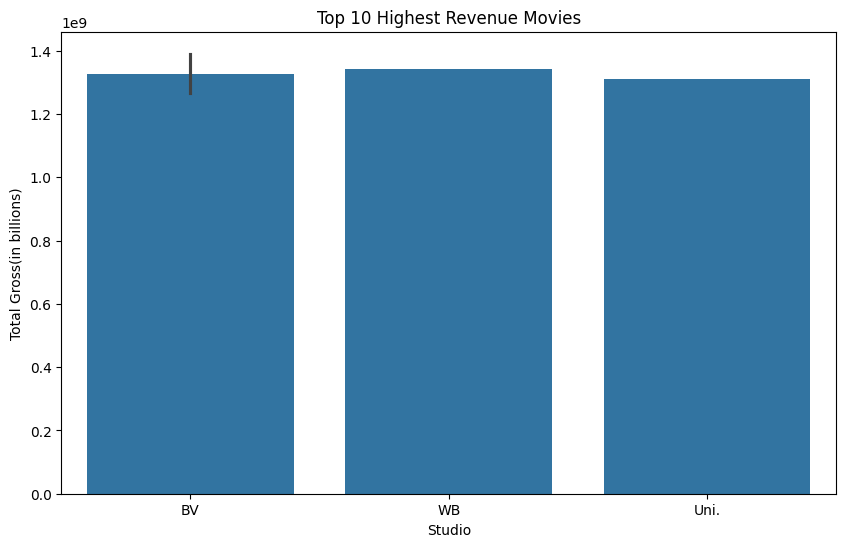

In [17]:
# Plot top 10 highest revenue movies
plt.figure(figsize=(10, 6))
sns.barplot(data=movie_gross, x='studio', y='total_gross')
plt.title('Top 10 Highest Revenue Movies')
plt.xlabel('Studio')
plt.ylabel('Total Gross(in billions)')
plt.show()

Most popular movies in the domestic market

In [8]:
sorted_df = movie_gross.sort_values(by='domestic_gross', ascending=False)
sorted_df.head()


,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


In [16]:
most_popular_movies = sorted_df
most_popular_movies = most_popular_movies.head()
most_popular_movies

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


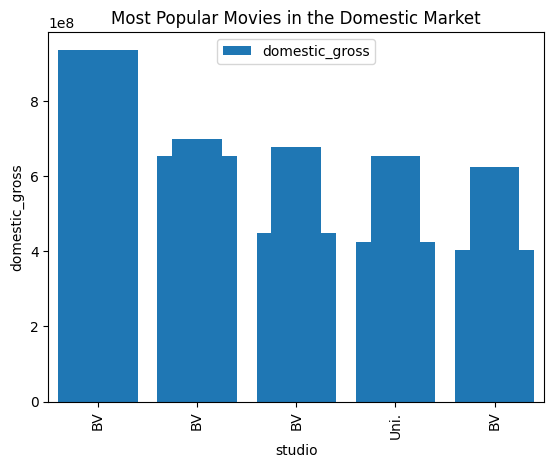

In [18]:
import matplotlib.pyplot as plt
most_popular_movies.plot(kind='bar', x='studio', y='domestic_gross', title='Most Popular Movies in the Domestic Market')
x= sorted_df['studio'].astype(str)
y= sorted_df['domestic_gross']
plt.xlabel('studio')
plt.ylabel('domestic_gross')
plt.bar(x,y);

Least popular movies in the domestic market

In [14]:
sorted_df = movie_gross.sort_values(by='domestic_gross', ascending=True)
sorted_df.head()

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100.0,NaN,2013
2321,The Chambermaid,FM,300.0,NaN,2015
2756,News From Planet Mars,KL,300.0,NaN,2016
2757,Satanic,Magn.,300.0,NaN,2016
1018,Apartment 143,Magn.,400.0,426000,2012


Most popular movies in the foreign market

In [15]:
sorted_df = movie_gross.sort_values(by='foreign_gross', ascending=False)
sorted_df.head()

,title,studio,domestic_gross,foreign_gross,year
1805,Life's a Breeze,Magn.,3500.0,99700,2014
1331,The East,FoxS,2300000.0,99700,2013
302,White Lion,Scre.,NaN,99600,2010
2906,A United Kingdom,FoxS,3900000.0,9900000,2017
510,Le Havre,Jan.,612000.0,9900000,2011


In [21]:
most_popular_movies = sorted_df
most_popular_movies = most_popular_movies.head()
most_popular_movies

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


Least selling movies in the foreign market

In [16]:
sorted_df = movie_gross.sort_values(by='foreign_gross', ascending=True)
sorted_df.head()

,title,studio,domestic_gross,foreign_gross,year
2760,The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1874,Furious 7,Uni.,353000000.0,"1,163.0",2015
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018


descriptive statistics

In [26]:
movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [28]:
movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [29]:
# most popular movies greater than 90
movie_gross[movie_gross['domestic_gross'] > 90]

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Scatter plot

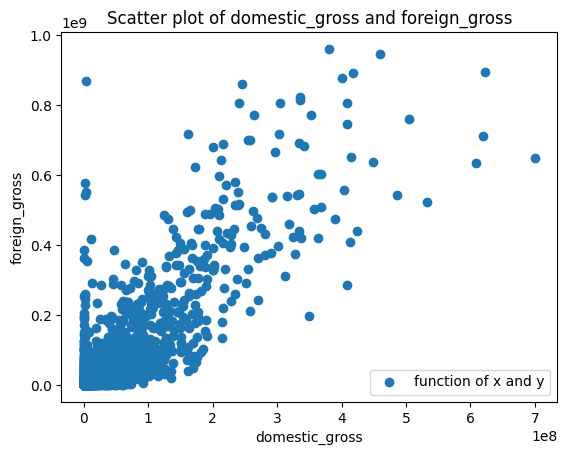

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(movie_gross['domestic_gross'], movie_gross['foreign_gross'])
plt.xlabel('domestic_gross')
plt.ylabel('foreign_gross')
plt.title('Scatter plot of domestic_gross and foreign_gross')
plt.legend(loc='lower right', labels=['function of x and y'])
plt.show()

Bar graph

TypeError: 'value' must be an instance of str or bytes, not a float

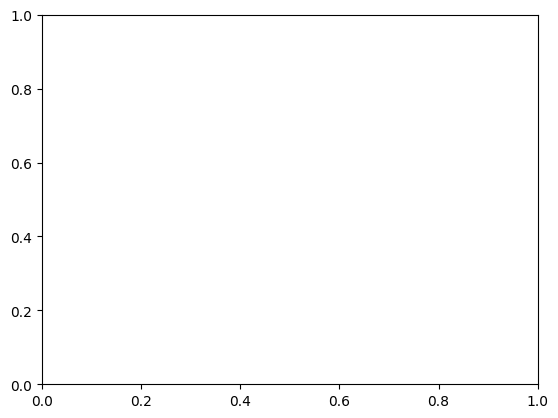

In [72]:
import matplotlib.pyplot as plt
import numpy as np
movie_gross['studio'] = movie_gross['studio'].astype(str)
movie_gross['studio'] =movie_gross['studio'].head()
movie_gross['domestic_gross'] =movie_gross['domestic_gross'].head()
plt.bar(movie_gross['studio'], movie_gross['domestic_gross'])
plt.xlabel('studio')
plt.ylabel('domestic_gross')
plt.title('Bar graph of studio and domestic_gross')
plt.show()